<h1><center> Statistiques sous Python (avec Pandas) </center></h1>

## Analyse de Données Massives

Nous allons utiliser dans cet exercice le module pandas permettant l'analyse de données avec Python. La première instruction est d'installer le module, à faire dans un terminale de commande.
<br>

- pip install pandas

Une fois le module est installé, nous pouvons lancer un notebook pour commencer notre programme. Il faut tout d'abord importer le module.



In [1]:
# Importatioon du module pandas & scipy

import pandas
import scipy.stats





## Données
    
    
Nous allons travailler sur des données collectées par un serveur (data.csv). Il a enregistré des informations sur chaque pourboire qu'il a reçu sur une période de quelques mois en travaillant dans un restaurant. Il a collecté plusieurs variables:

1. facture en dollars (total_bill),

2. pourboire en dollars (tip),

3. sexe du payeur de factures (sex),

4. s'il y avait des fumeurs dans la fête (smoker),

5. jour de la semaine (day),

6. moment de la journée (time),

7. taille de la fête (size).


- Lire ces données dans le <code>Notebook</code> avec <code>read_csv()</code> de <code>pandas</code>.</p>


In [2]:

# Lecture d'un fichier texte
tips = pandas.read_csv("donnees/data.csv", 
                       header = 0, sep = ",")




<p>Sur ces données, il est bien évidemment possible de voir quelques informations classiques.</p>


In [3]:
# Type des données
type(tips)



pandas.core.frame.DataFrame

In [4]:
# Type des données
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
# Taille
tips.shape



(244, 7)

In [6]:
#nombre d'observation par champs
tips.count()



total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [7]:
# Afficher l'entête du jeu de données dans une liste
list(tips.columns)



['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [8]:
# Afficher l'entête du jeu de données dans une liste
list(tips)



['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


## Statistiques descriptives univariés


- Décrire et afficher toutes les variables quantitatives du jeu de données directement (fichier csv).
  ex: nombre d'obseravtions, moyenne, écart-type, min-max, quantile Q1, quantile Q2, quantile Q3

In [9]:

# résumé basique
tips.describe()



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- Arrandire les valeurs (2 chiffres après la virgule)

In [10]:

tips.describe().round(2)



,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


- Décrire juste une seule variable quantitative (ex: <code>"facture"</code>).</p>


In [11]:

tips.total_bill.describe()



count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [12]:

tips["total_bill"].describe()



count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

- Calculer sa moyenne, écart-type, variance, médiane, min, max, quantiles

In [13]:

tips.total_bill.mean()



19.785942622950824

In [14]:

tips.total_bill.std()



8.902411954856856

In [15]:

tips.total_bill.var()



79.25293861397826

In [16]:

tips.total_bill.min()



3.07

In [17]:

tips.total_bill.max()



50.81

In [18]:

tips.total_bill.median()



17.795

In [19]:

tips.total_bill.quantile([.01, .1, .9, .99])



0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: total_bill, dtype: float64


## Histogramme

Pour représenter graphiquement les variables d'un jeu de données, <code>pandas</code> met à disposition (via le module <code>matplotlib</code> utilisé par <code>pandas</code>) des fonctions graphiques.

- Réaliser un <strong>histogramme</strong>, en utilisant une version avec la fonction <code>hist()</code>. 

- Une deuxième version avec la fonction <code>plot()</code>.

- Réaliser les deux fonctions précedentes, mais seulement pour une seule variable du jeu de données

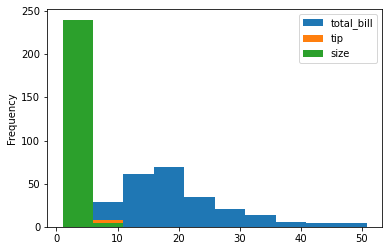

In [20]:

tips.plot.hist()



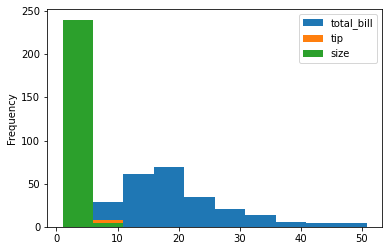

In [21]:
tips.plot(kind = "hist")

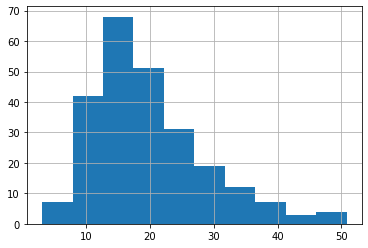

In [22]:

tips.total_bill.hist()



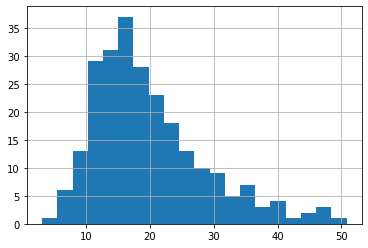

In [23]:

tips.total_bill.hist(bins = 20)



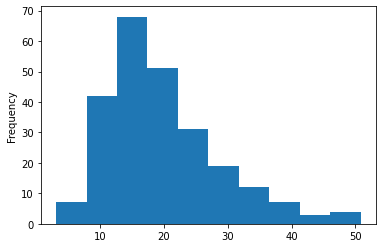

In [24]:

tips.total_bill.plot(kind = "hist")




## Boîtes à moustaches
    
    
- Afficher les <strong>boîtes à moustaches</strong> du jeu de données.


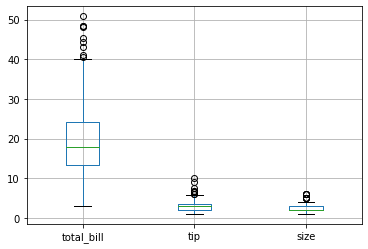

In [25]:
tips.boxplot()


- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique.

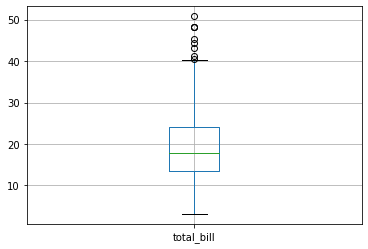

In [26]:

tips.boxplot(column = "total_bill")



- Afficher <strong>la boîte à moustache</strong> d'une variable spécifique en enlevant la gride.

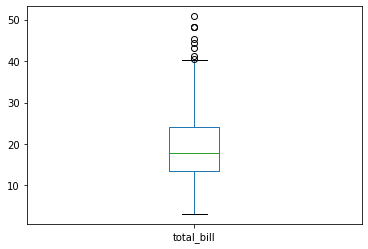

In [27]:

tips.boxplot(column = "total_bill", grid = False)




## Qualitative
    
- Afficher la table d'occurences (ou des effectifs) des variables qualitatives, ainsi que la table des proportions des modalités.</p>

In [28]:

tips.sex.describe()



count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [29]:

tips.sex.unique()



array(['Female', 'Male'], dtype=object)

- Calculer le nombre d'occurence par modalité de la variable sex par deux versions (value_counts() et crosstab() )

In [30]:

tips.sex.value_counts()



Male      157
Female     87
Name: sex, dtype: int64

In [31]:

pandas.crosstab(tips.sex, "freq")



col_0,freq
sex,
Female,87
Male,157


- Calculer le nombre d'occurence normalisé par modalité de la variable sex par deux versions

In [32]:

pandas.crosstab(tips.sex, "freq", normalize=True)



col_0,freq
sex,
Female,0.356557
Male,0.643443



### Diagramme en barres 
    
- Réaliser un <strong>diagramme en barres</strong>, en utilisant le type <code>"bar"</code> pour <code>plot()</code>. 

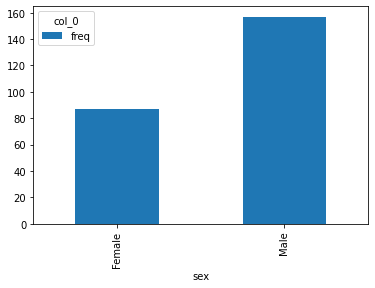

In [33]:

t = pandas.crosstab(tips.sex, "freq")
t.plot.bar()



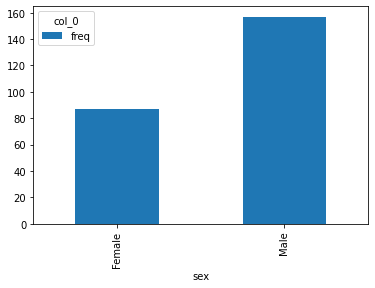

In [34]:

t.plot(kind = "bar")



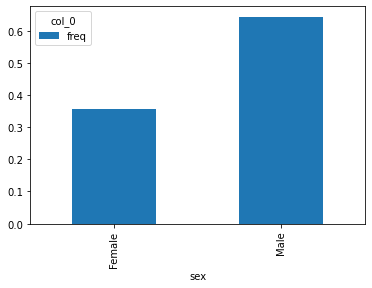

In [35]:

t = pandas.crosstab(tips.sex, "freq", normalize=True)
t.plot(kind = "bar")



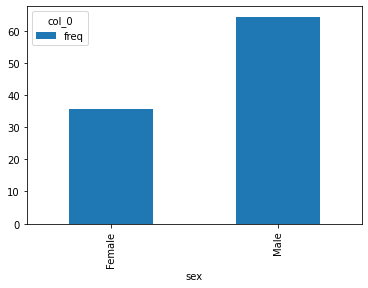

In [36]:

(t * 100).plot(kind = "bar")




### Diagramme circulaire

- Réaliser un <strong>diagramme circulaire</strong>, pour le tableau des effectifs de la variable sex produit par <code>crosstab()</code>.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A015992908>],
      dtype=object)

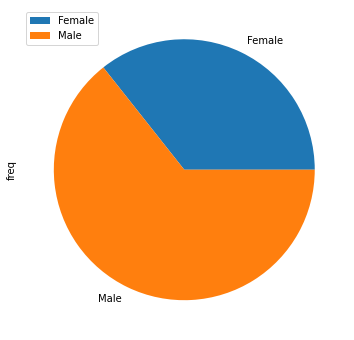

In [37]:

t = pandas.crosstab(tips.sex, "freq")
t.plot.pie(subplots=True, figsize = (6,6))



## Statistiques descriptives bivariées

### Quantitative

- Calculer la correlation entre les différentes variables du jeu de données.

In [38]:

tips.corr()



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [39]:
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


- Calculer la correlation entre deux variables du jeu de données.

In [40]:

tips.total_bill.corr(tips.tip)



0.6757341092113641

- Calculer la covarriance entre deux variables du jeu de données.

In [41]:

tips.total_bill.cov(tips.tip)



8.323501629224854


### Nuage de points

- Afficher le nuage des points des deux variables X=facture et Y=pourboire

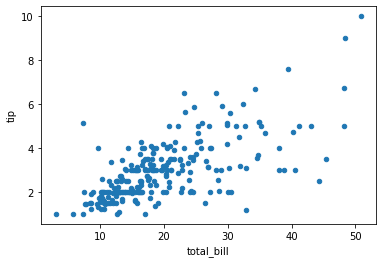

In [42]:

tips.plot.scatter("total_bill", "tip")




### Qualitative

In [43]:

# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données

pandas.crosstab(tips.sex, tips.smoker)



smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [44]:
# Afficher la table croisée du nombre des fumeurs et non fumeurs selon leur sex avec le nombre total de chaque ligne/colonne dans le jeux de données

pandas.crosstab(tips.sex, tips.smoker, margins=True)



smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [45]:
# Afficher la table croisée normalisée du nombre des fumeurs et non fumeurs selon leur sex dans le jeux de données

pandas.crosstab(tips.sex, tips.smoker, normalize = True)



smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


In [46]:
# Afficher la moyenne des factures, pourboires et size groupée par sex
tips.groupby("sex").mean()



,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


In [47]:
# Afficher la moyenne des factures groupée par sex

tips.groupby("sex")["total_bill"].mean()


sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [48]:
# Afficher la moyenne, l'écart-type, médiane, min et max de la variable facture groupés par sex
import numpy

tips.groupby("sex")["total_bill"].agg([numpy.mean, numpy.std, numpy.median, numpy.min, numpy.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A015502808>,
      dtype=object)

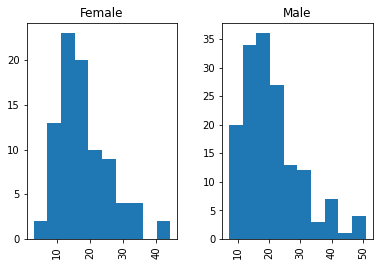

In [49]:
# Afficher les deux histogrammes de la variable facture selon le sex
tips.hist(column = "total_bill", by = "sex")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A015FD4D48>,
      dtype=object)

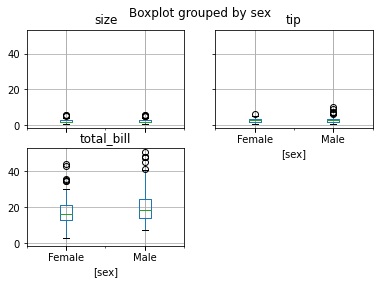

In [50]:
# Afficher les boites à moustache de toutes les variables (facture, pourboire, size) selon le sex


tips.boxplot(by = "sex")


### Diagramme en barres

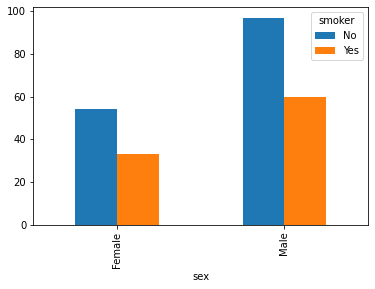

In [51]:

# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex

t = pandas.crosstab(tips.sex, tips.smoker)
t.plot.bar()



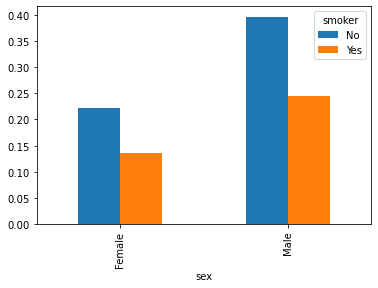

In [52]:
# Afficher le diagramme en barres du nombre des fumeurs et non fumeurs selon leur sex normalisé


t = pandas.crosstab(tips.sex, tips.smoker, normalize=True)
t.plot.bar()

